In [337]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
%matplotlib inline

In [26]:
df_path = '/Users/qiu/社会情報学研究法/netflix_titles.csv'
df = pd.read_csv(df_path, encoding='ISO-8859-1')

In [23]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.shape

(8809, 26)

In [39]:
df_cleaned = df.drop(columns=[col for col in df.columns if "Unnamed" in col])

In [41]:
df_cleaned['country'].fillna("Unknown", inplace=True)
df_cleaned['duration'].fillna("Unknown", inplace=True)
df_cleaned['listed_in'].fillna("Unknown", inplace=True)
df_cleaned['rating'].fillna("Unknown", inplace=True)

In [70]:
print(df_cleaned[['type', 'duration']].head(10))

      type   duration
0    Movie     90 min
1  TV Show  2 Seasons
2  TV Show   1 Season
3  TV Show   1 Season
4  TV Show  2 Seasons
5  TV Show   1 Season
6    Movie     91 min
7    Movie    125 min
8  TV Show  9 Seasons
9    Movie    104 min


In [74]:
print(df_cleaned['duration'].unique())

['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'
 '189 min' '141 min' '130 min' '138 min' '81 min' '132 min' '10 Seasons'
 '123 min' '65 min' '68 min' '66 min' '62 min' '74 min' '131 min' '39 min'
 '46 m

In [122]:
def convert_duration_to_minutes(duration):
    if 'Season' in duration:
        return 0
    else:
        try:
            return int(duration.split(' ')[0])
        except ValueError:
            return 0

In [375]:
df_cleaned['duration_minutes'] = df_cleaned['duration'].apply(convert_duration_to_minutes)

In [377]:
movies_data = df_cleaned[df_cleaned['type'] == 'Movie']

In [379]:
print(movies_data)

     show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sankofa   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
...      ...    ...                               ...   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8805   s8806  Movie                              Zoom   
8806   s8807  Movie                            Zubaan   
8808   s8809  Movie                            Serena   

                            director  \
0                    Kirsten Johnson   
6     Robert Cullen, JosÃ© Luis Ucha   
7                       Haile Gerima   
9                     Theodore Melfi   
12               Christian Schwochow   
...                              ...   
8802                   David Finche

In [381]:
print(movies_data[['duration_minutes', 'release_year']].describe())

       duration_minutes  release_year
count       6132.000000   6132.000000
mean          99.530170   2013.121657
std           28.367286      9.677387
min            0.000000   1942.000000
25%           87.000000   2012.000000
50%           98.000000   2016.000000
75%          114.000000   2018.000000
max          312.000000   2021.000000


In [387]:
mod = sm.OLS.from_formula('duration_minutes~release_year',data = movies_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       duration_minutes   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     271.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           1.21e-59
Time:                        11:20:43   Log-Likelihood:                -29081.
No. Observations:                6132   AIC:                         5.817e+04
Df Residuals:                    6130   BIC:                         5.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1313.9980     73.758     17.815   

In [146]:
import matplotlib.font_manager as fm

In [154]:
font_path = '/Library/Fonts/Arial Unicode.ttf' 
prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

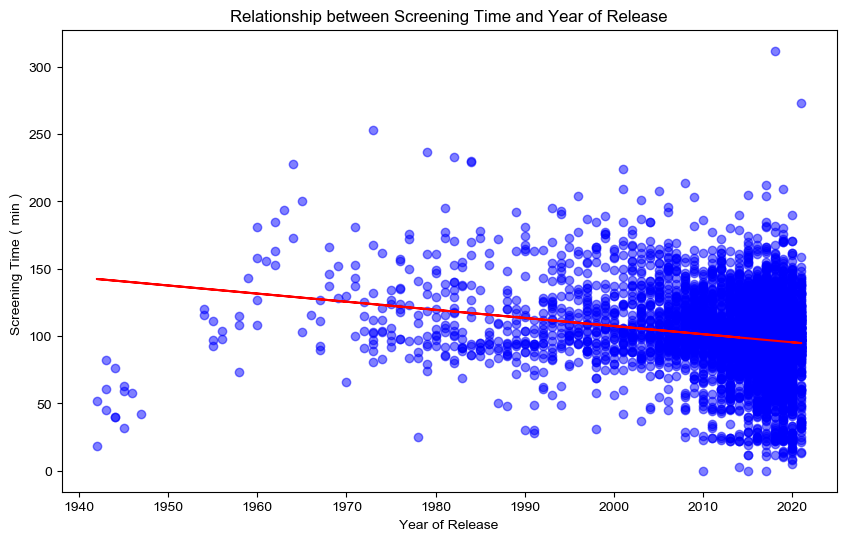

In [156]:
y = movies_data['duration_minutes']
x = movies_data['release_year']
y_hat = res.fittedvalues
plt.figure(figsize=(10, 6))
plt.scatter(x = x,y = y, color = 'blue',alpha = 0.5)
plt.plot(x,y_hat, color='red')
plt.title('Relationship between Screening Time and Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Screening Time（min）')
plt.show()

In [158]:
pre_2016 = movies_data[movies_data['release_year'] < 2016]
post_2016 = movies_data[movies_data['release_year'] >= 2016]

In [160]:
formula_pre_2016 = 'duration_minutes ~ release_year'
model_pre_2016 = sm.OLS.from_formula(formula_pre_2016, data=pre_2016).fit()

In [162]:
formula_post_2016 = 'duration_minutes ~ release_year'
model_post_2016 = sm.OLS.from_formula(formula_post_2016, data=post_2016).fit()

In [164]:
print("2016年之前的回归结果：")
print(model_pre_2016.summary())
print("\n2016年及之后的回归结果：")
print(model_post_2016.summary())

2016年之前的回归结果：
                            OLS Regression Results                            
Dep. Variable:       duration_minutes   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     62.59
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           3.78e-15
Time:                        16:24:00   Log-Likelihood:                -12049.
No. Observations:                2513   AIC:                         2.410e+04
Df Residuals:                    2511   BIC:                         2.411e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      896.1118     99.835

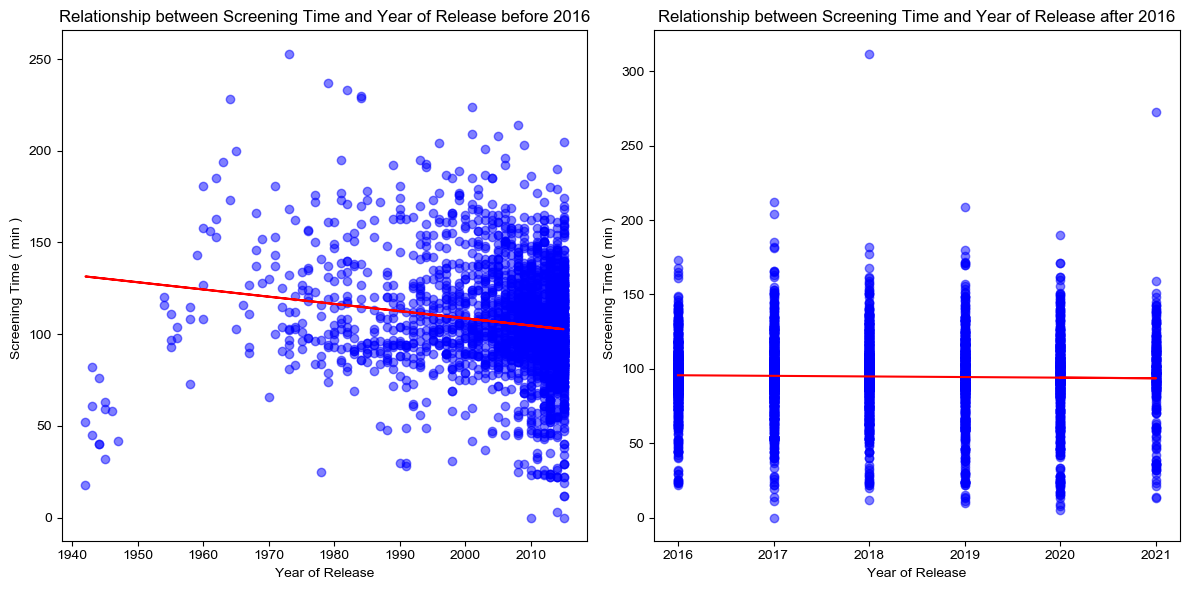

In [186]:
plt.figure(figsize=(12,6))
# 绘制2016年之前的数据
plt.subplot(1, 2, 1)
y_pre = pre_2016['duration_minutes']
x_pre = pre_2016['release_year']
y_hat_pre = model_pre_2016.fittedvalues

plt.scatter(x_pre, y_pre, color='blue', alpha=0.5)
plt.plot(x_pre, y_hat_pre, color='red')
plt.title('Relationship between Screening Time and Year of Release before 2016')
plt.xlabel('Year of Release')
plt.ylabel('Screening Time（min）')

# 绘制2016年及之后的数据
plt.subplot(1, 2, 2)
y_post = post_2016['duration_minutes']
x_post = post_2016['release_year']
y_hat_post = model_post_2016.fittedvalues

plt.scatter(x_post, y_post, color='blue', alpha=0.5)
plt.plot(x_post, y_hat_post, color='red')
plt.title('Relationship between Screening Time and Year of Release after 2016')
plt.xlabel('Year of Release')
plt.ylabel('Screening Time（min）')

plt.tight_layout()
plt.show()

In [321]:
tv_shows_data = df_cleaned[df_cleaned['type'] == 'TV Show']

In [323]:
tv_shows_data = tv_shows_data[['release_year', 'duration']].dropna()

In [325]:
def parse_seasons(duration):
    if 'Season' in duration:
        try:
            return int(duration.split()[0])
        except ValueError:
            return None
    else:
        return None

In [329]:
tv_shows_data['seasons'] = tv_shows_data['duration'].apply(parse_seasons)

In [333]:
tv_shows_data = tv_shows_data.dropna(subset=['seasons'])

In [369]:
mmod = sm.OLS.from_formula('release_year ~ seasons',data = tv_shows_data)
mres = mmod.fit()
print(mres.summary())

                            OLS Regression Results                            
Dep. Variable:           release_year   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     22.04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           2.81e-06
Time:                        11:15:51   Log-Likelihood:                -8465.4
No. Observations:                2677   AIC:                         1.693e+04
Df Residuals:                    2675   BIC:                         1.695e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2017.1872      0.166   1.22e+04      0.0

In [363]:
tv_shows_data[['seasons','release_year']].corr()

,seasons,release_year
seasons,1.000000,-0.090395
release_year,-0.090395,1.000000


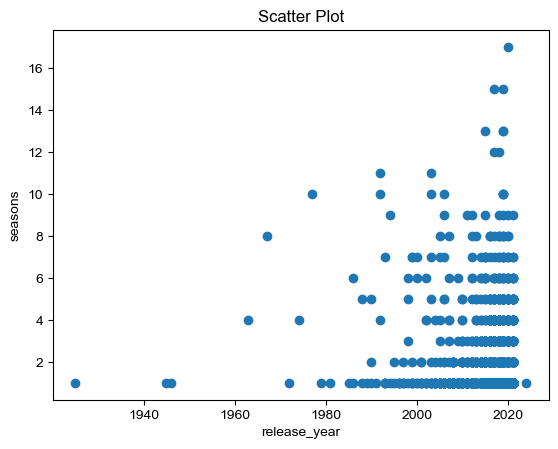

In [367]:
plt.scatter(tv_shows_data['release_year'],tv_shows_data['seasons'])
plt.xlabel('release_year')
plt.ylabel('seasons')
plt.title('Scatter Plot')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


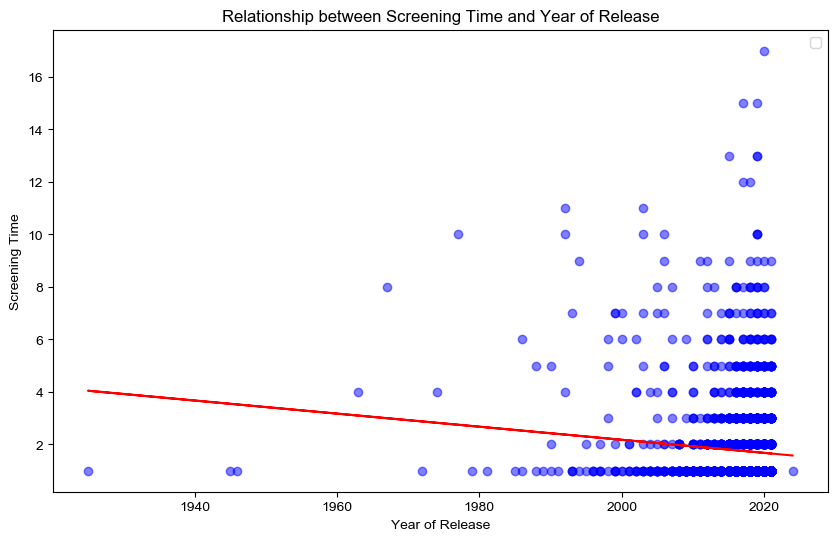

In [353]:
y = tv_shows_data['seasons']
x = tv_shows_data['release_year']
y_hat_tv = mres.fittedvalues
plt.figure(figsize=(10, 6))
plt.scatter(x=x, y=y, color='blue', alpha=0.5)
plt.plot(x, y_hat_tv, color='red')
plt.title('Relationship between Screening Time and Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Screening Time')
plt.legend()
plt.show()

In [357]:
formula = "seasons ~ release_year + I(release_year**2)"
quadratic_model = sm.OLS.from_formula(formula, data=tv_shows_data).fit()
print(quadratic_model.summary())

                            OLS Regression Results                            
Dep. Variable:                seasons   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.53
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.04e-05
Time:                        23:48:31   Log-Likelihood:                -5015.3
No. Observations:                2677   AIC:                         1.004e+04
Df Residuals:                    2674   BIC:                         1.005e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -678.9726 